In [7]:
import os
os.makedirs("data", exist_ok=True)   # klasör yoksa oluştur


In [8]:
import pandas as pd

# Basit bir veri seti oluşturup kaydedelim
data = {
    "Complaint ID": [101, 102, 103, 104],
    "Department": ["Production", "QA", "Supplier", "R&D"],
    "Severity": [3, 2, 4, 1],
    "Probability": [2, 3, 4, 1],
    "Status": ["Closed", "Open", "Open", "Closed"]
}

df = pd.DataFrame(data)
df.to_csv("data/complaints.csv", index=False)
print("📁 CSV kaydedildi:", os.path.abspath("data/complaints.csv"))


📁 CSV kaydedildi: /Users/fatmatumer/python-basics/notebooks/data/complaints.csv


In [9]:
df = pd.read_csv("data/complaints.csv")
df.head()


,Complaint ID,Department,Severity,Probability,Status
0,101,Production,3,2,Closed
1,102,QA,2,3,Open
2,103,Supplier,4,4,Open
3,104,R&D,1,1,Closed


In [10]:
print("🔹 Satır sayısı:", len(df))
print("🔹 Sütunlar:", list(df.columns))
print("\nDepartmanlara göre kayıt sayısı:")
print(df["Department"].value_counts())


🔹 Satır sayısı: 4
🔹 Sütunlar: ['Complaint ID', 'Department', 'Severity', 'Probability', 'Status']

Departmanlara göre kayıt sayısı:
Department
Production    1
QA            1
Supplier      1
R&D           1
Name: count, dtype: int64


In [11]:
df["Risk Score"] = df["Severity"] * df["Probability"]
df["Risk Level"] = df["Risk Score"].apply(
    lambda x: "Low" if x < 4 else ("Medium" if x < 8 else "High")
)
df


,Complaint ID,Department,Severity,Probability,Status,Risk Score,Risk Level
0,101,Production,3,2,Closed,6,Medium
1,102,QA,2,3,Open,6,Medium
2,103,Supplier,4,4,Open,16,High
3,104,R&D,1,1,Closed,1,Low


In [12]:
summary = df.groupby("Risk Level")["Complaint ID"].count().reset_index()
summary.columns = ["Risk Level", "Complaint Count"]
summary


,Risk Level,Complaint Count
0,High,1
1,Low,1
2,Medium,2


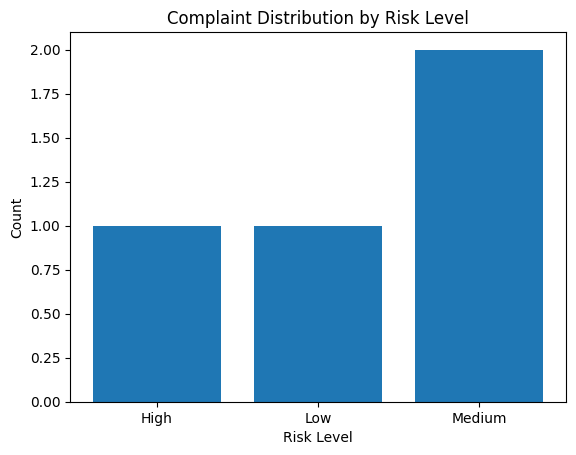

In [15]:
import matplotlib.pyplot as plt

plt.bar(summary["Risk Level"], summary["Complaint Count"])
plt.title("Complaint Distribution by Risk Level")
plt.xlabel("Risk Level")
plt.ylabel("Count")
plt.show()


In [17]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Complaint Data Report", explorative=True)
profile.to_file("data/complaints_report.html")
print("✅ Profil raporu oluşturuldu: data/complaints_report.html")


Summarize dataset:  33%|▎| 4/12 [00:00<00:00, 124.56it/s, Describe variable: Ris
Export report to file: 100%|████████████████████| 1/1 [00:00<00:00, 1729.61it/s]

✅ Profil raporu oluşturuldu: data/complaints_report.html


In [18]:
print("🎯 Week 2 – Part 1 completed! Fatma analyzed data with Pandas successfully.")


🎯 Week 2 – Part 1 completed! Fatma analyzed data with Pandas successfully.
